Notes:

*(1-7-2024)* AnovaRM was used by Phind, but actually it looks like pingouin has better ANOVA implementation: https://pingouin-stats.org/build/html/index.html

In [2]:
# Imports for analyzing and visualizing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [3]:
# Set seed for reproducibility
np.random.seed(42)
rng = np.random.default_rng() # create random number Generator

# Number of subjects
n_subjects = 15

# Data parameters
meas_var = 0.3

# Define the levels of factors A and B
levels_A = ['Normal', 'Bold', 'Bold-Italic']

A_effect = np.array([2, 5, 6]) # defines the effect
print(A_effect)
sbj_effect = rng.random(n_subjects) # variation across subjects
meas = np.outer(sbj_effect,A_effect) + rng.standard_normal(size=(n_subjects,len(levels_A)))*meas_var
meas = meas.clip(min=0) # make the minimum value = 0

# Generate random data
data = {
    'subject': np.repeat(np.arange(n_subjects), len(levels_A)),
    'factor': np.tile(levels_A, n_subjects),
    'words': np.reshape(meas,n_subjects*len(levels_A))
}

# Create a DataFrame
df = pd.DataFrame(data)

# Randomly shift the values for each subject so there are clear differences between them

print(df)


[2 5 6]
    subject       factor     words
0         0       Normal  0.529057
1         0         Bold  1.212405
2         0  Bold-Italic  0.761739
3         1       Normal  0.662114
4         1         Bold  1.530825
5         1  Bold-Italic  2.066204
6         2       Normal  1.917254
7         2         Bold  4.021995
8         2  Bold-Italic  4.576154
9         3       Normal  0.734645
10        3         Bold  3.160344
11        3  Bold-Italic  3.625569
12        4       Normal  0.654231
13        4         Bold  1.666594
14        4  Bold-Italic  2.203641
15        5       Normal  0.962018
16        5         Bold  3.442225
17        5  Bold-Italic  3.806570
18        6       Normal  0.757391
19        6         Bold  1.892180
20        6  Bold-Italic  1.424329
21        7       Normal  0.657192
22        7         Bold  2.013099
23        7  Bold-Italic  2.601893
24        8       Normal  0.513853
25        8         Bold  1.990348
26        8  Bold-Italic  2.041552
27        9 

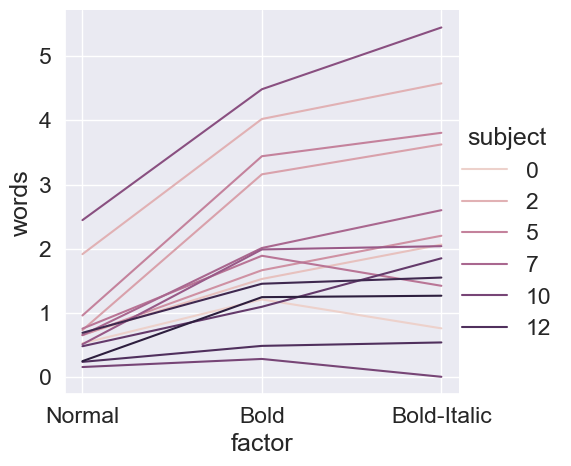

In [8]:
# Plotting
sns.set_theme(font_scale=1.5)
g = sns.relplot(df, x="factor", y="words", hue="subject", kind="line")
g.savefig('../fig/rmANOVA_example.png')

In [9]:
# Calculate rmANOVA
mdl = AnovaRM(df,depvar='words',subject='subject',within=['factor'])
res = mdl.fit()
print(res.summary())

               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
factor 33.8738 2.0000 28.0000 0.0000



In [ ]:
# Calculate the mean squared error of the within-subject effect

# Calculate the mean squared error of the within-subject error
### This is the error calculated after partialling out the between-subject variability (mean squared)



In [ ]:
# Calculate the F-statistic

# Plot the F-statistic labeled on the F distribution

# Indicate the area used to calculate p-value